<a href="https://colab.research.google.com/github/orhansonmeztr/testrepo/blob/main/falcon40b_with_translated_texts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qU transformers accelerate einops langchain xformers bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.5 MB/s eta 0:00:00


In [2]:
from torch import cuda, bfloat16
import transformers

model_name = 'tiiuae/falcon-40b-instruct'

device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

# set quantization configuration to load large model with less GPU memory
# this requires the `bitsandbytes` library
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=bfloat16
)

model = transformers.AutoModelForCausalLM.from_pretrained(
    model_name,
    trust_remote_code=True,
    quantization_config=bnb_config,
    device_map='auto'
)
model.eval()
print(f"Model loaded on {device}")

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-40b-instruct:
- configuration_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-40b-instruct:
- modelling_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 8.0
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('8013'), PosixPath('//172.28.0.1'), PosixPath('http')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//colab.research.google.com/tun/m/cc483011

Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

Model loaded on cuda:0


In [3]:
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

In [4]:
from transformers import StoppingCriteria, StoppingCriteriaList

# we create a list of stopping criteria
stop_token_ids = [
    tokenizer.convert_tokens_to_ids(x) for x in [
        ['Human', ':'], ['AI', ':']
    ]
]

stop_token_ids

[[23431, 37], [17362, 37]]

In [5]:
import torch

stop_token_ids = [torch.LongTensor(x).to(device) for x in stop_token_ids]
stop_token_ids

[tensor([23431,    37], device='cuda:0'),
 tensor([17362,    37], device='cuda:0')]

In [6]:
from transformers import StoppingCriteria, StoppingCriteriaList

# define custom stopping criteria object
class StopOnTokens(StoppingCriteria):
    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        for stop_ids in stop_token_ids:
            if torch.eq(input_ids[0][-len(stop_ids):], stop_ids).all():
                return True
        return False

stopping_criteria = StoppingCriteriaList([StopOnTokens()])

In [7]:
generate_text = transformers.pipeline(
    model=model, tokenizer=tokenizer,
    return_full_text=True,  # langchain expects the full text
    task='text-generation',
    # we pass model parameters here too
    stopping_criteria=stopping_criteria,  # without this model rambles during chat
    temperature=0.0,  # 'randomness' of outputs, 0.0 is the min and 1.0 the max
    max_new_tokens=512,  # mex number of tokens to generate in the output
    repetition_penalty=1.1  # without this output begins repeating
)

The model 'RWForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PLBartForCausalLM', 'ProphetNetForCausalLM', 'QDQBertLMHeadModel', 'ReformerModelWithLMHead', 'RemBertForCausalLM', 'RobertaForCausalLM', 'RobertaPreLayerNormForC

In [8]:
from langchain.llms import HuggingFacePipeline
llm = HuggingFacePipeline(pipeline=generate_text)

In [10]:
!pip install langchain -qU langchain faiss-cpu sentence_transformers cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.3 MB/s eta 0:00:00


In [12]:
os.environ["HUGGINGFACEHUB_API_TOKEN"] = 'hf'
os.environ['COHERE_API_KEY'] = 'kb'

In [13]:
import os
import re
import cohere
from pathlib import Path
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CohereRerank
from langchain.chains import RetrievalQAWithSourcesChain,ConversationalRetrievalChain

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
db_dir = '/content/drive/MyDrive/turkish_pro_OS/data/data/vector_stores/'
model_name = "sentence-transformers/all-MiniLM-L6-v2"
sentence_embeddings = HuggingFaceEmbeddings(model_name=model_name)
sentence_db_dir = db_dir + "faiss_index_MCdocs_en_500_30_translated_nllb-200-distilled-600M_embedded_all-MiniLM-L6-v2"
print('SENTENCE_DB:', sentence_db_dir)
db = FAISS.load_local(sentence_db_dir, sentence_embeddings)

retriever  = db.as_retriever(search_type = 'similarity', search_kwargs= {"k":10})

compressor = CohereRerank(model='rerank-multilingual-v2.0', top_n = 3)
compression_retriever = ContextualCompressionRetriever(base_compressor=compressor, base_retriever=retriever)

qa = RetrievalQAWithSourcesChain.from_chain_type(
    # llm=llm,
    llm = llm,
    retriever = compression_retriever,
    return_source_documents = True,
    chain_type = "map_reduce")

SENTENCE_DB: /content/drive/MyDrive/turkish_pro_OS/data/data/vector_stores/faiss_index_MCdocs_en_500_30_translated_nllb-200-distilled-600M_embedded_all-MiniLM-L6-v2


In [18]:
question="If the employee leaves his job before the expiry of the contract or enters into the employment of another employer without complying with the notice period, the new employer is jointly responsible with the employee in what cases, alongside the employee, for the termination of the contract."

result = qa({'question':question})

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1259: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Token indices sequence length is longer than the specified maximum sequence length for this model (1901 > 1024). Running this sequence through the model will result in indexing errors
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


In [20]:
result['answer']

' The new employer is jointly responsible with the employee in certain cases for the termination of the contract.\n'

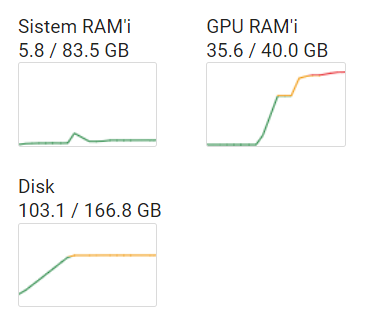